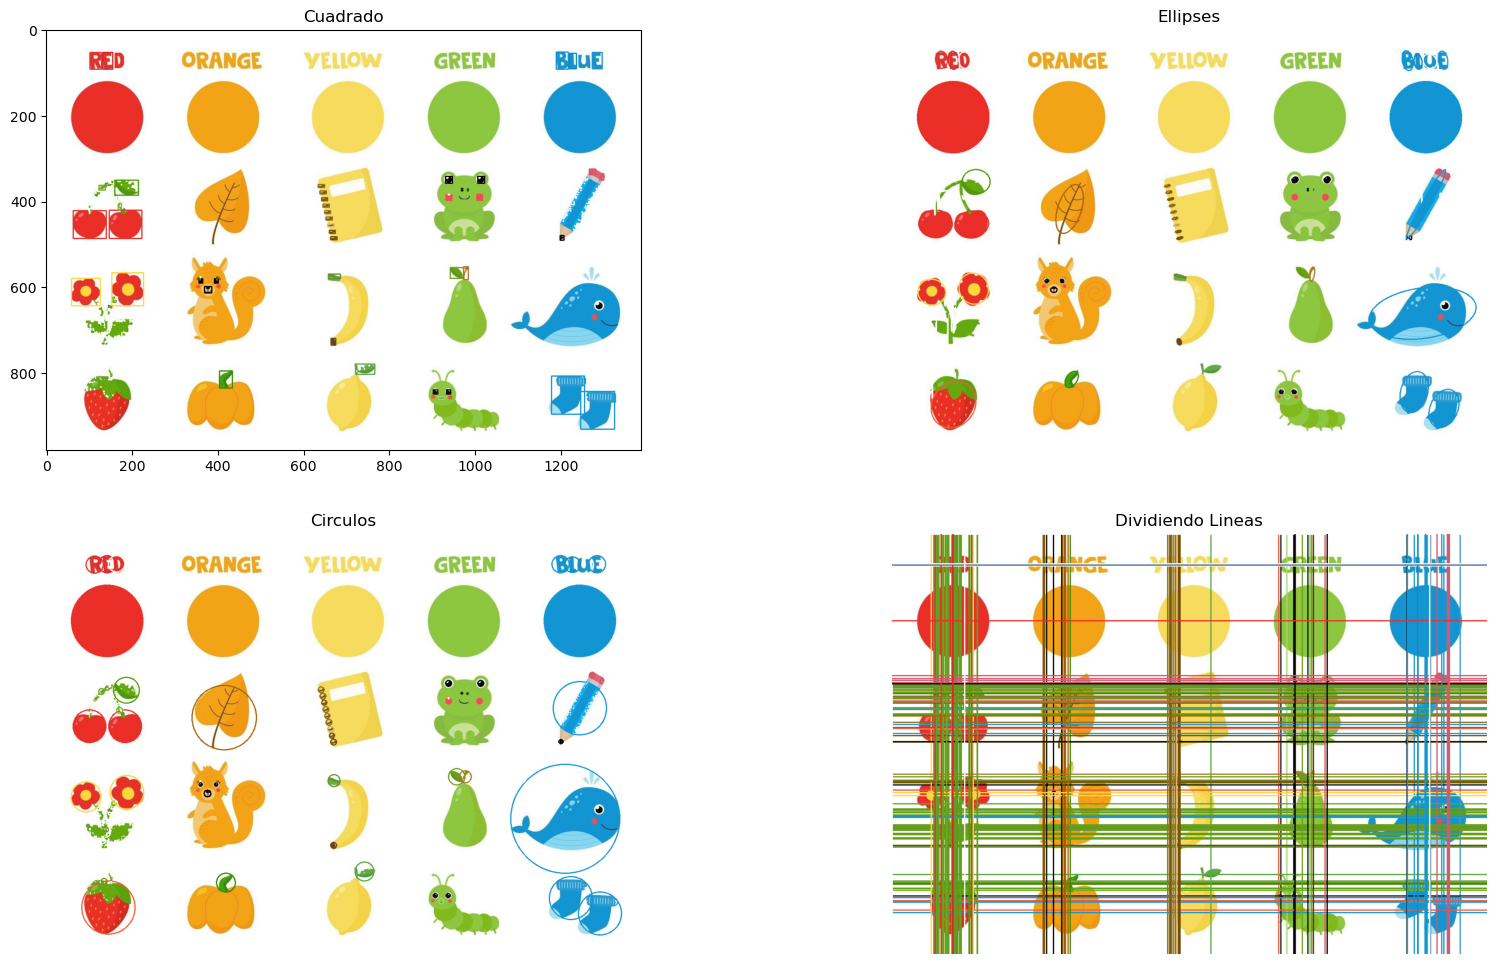

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'colores.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_bounding_boxes = image_rgb.copy()
image_ellipses = image_rgb.copy()
image_circles = image_rgb.copy()
image_lines = image_rgb.copy()

for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    color = (int(image_rgb[cy, cx][0]), int(image_rgb[cy, cx][1]), int(image_rgb[cy, cx][2]))

    x, y, w, h = cv2.boundingRect(contour)
    if w < 100 and h < 100:
        cv2.rectangle(image_bounding_boxes, (x, y), (x + w, y + h), color, 2)

    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        if ellipse[1][0] > 0 and ellipse[1][1] > 0:
            cv2.ellipse(image_ellipses, ellipse, color, 2)

    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image_circles, center, radius, color, 2)

    cv2.line(image_lines, (cx, 0), (cx, image_rgb.shape[0]), color, 2)
    cv2.line(image_lines, (0, cy), (image_rgb.shape[1], cy), color, 2)

plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
plt.imshow(image_bounding_boxes)
plt.title('Cuadrado')

plt.subplot(2, 2, 2)
plt.imshow(image_ellipses)
plt.title('Ellipses')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_circles)
plt.title('Circulos')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_lines)
plt.title('Dividiendo Lineas')
plt.axis('off')

plt.show()





Mi cara con cara de dormido ingeniera estoy apenas

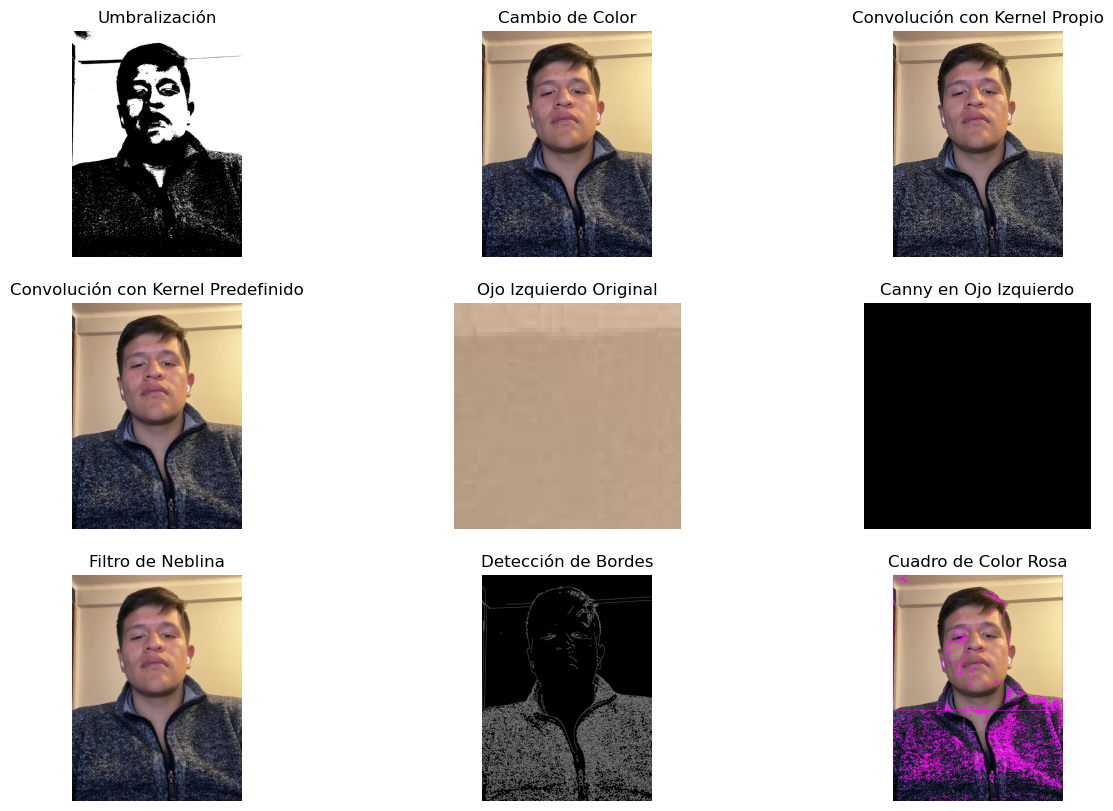

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('rostro1.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

image_color_change = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

kernel_propio = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
convolucion_propio = cv2.filter2D(image, -1, kernel_propio)

convolucion_predefinido = cv2.GaussianBlur(image, (5, 5), 0)

eye_left = image[80:140, 130:190]
eye_left_canny = cv2.Canny(eye_left, 100, 200)

hazy = cv2.addWeighted(image, 0.7, cv2.GaussianBlur(image, (21, 21), 0), 0.3, 0)

edges = cv2.Canny(gray, 100, 200)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
perimeters = [cv2.arcLength(c, True) for c in contours]
M = [cv2.moments(c) for c in contours]
centroids = [(int(m['m10'] / m['m00']), int(m['m01'] / m['m00'])) if m['m00'] != 0 else (0, 0) for m in M]

image_with_box = image.copy()
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image_with_box, (x, y), (x + w, y + h), (255, 0, 255), 2)

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Umbralización')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(image_color_change, cv2.COLOR_HSV2RGB))
plt.title('Cambio de Color')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(convolucion_propio, cv2.COLOR_BGR2RGB))
plt.title('Convolución con Kernel Propio')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(convolucion_predefinido, cv2.COLOR_BGR2RGB))
plt.title('Convolución con Kernel Predefinido')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(eye_left, cv2.COLOR_BGR2RGB))
plt.title('Ojo Izquierdo Original')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(eye_left_canny, cmap='gray')
plt.title('Canny en Ojo Izquierdo')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(hazy, cv2.COLOR_BGR2RGB))
plt.title('Filtro de Neblina')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(edges, cmap='gray')
plt.title('Detección de Bordes')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.title('Cuadro de Color Rosa')
plt.axis('off')

plt.show()

